# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [65]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [47]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)

<module 'metricas' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\metricas.py'>

In [48]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

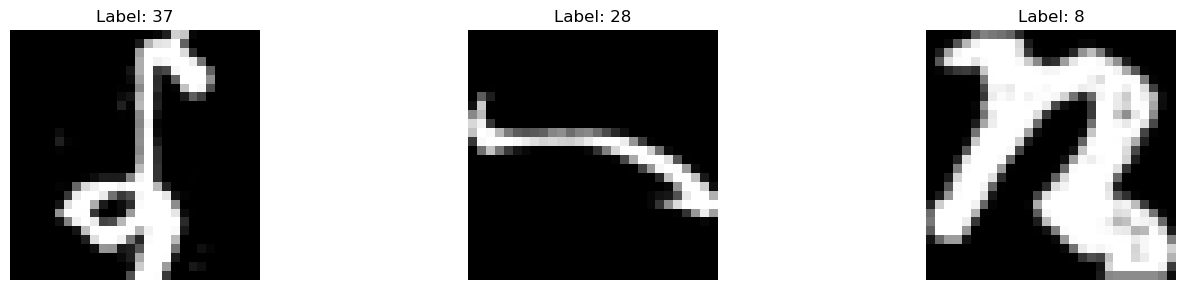

In [49]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [50]:
importlib.reload(ds)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = ds.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_normalized, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 3.954963997930839
loss val: 1.3208336049327856
Epoch 10, Loss: 3.7374996053973057
loss val: 1.2581443644904038
Epoch 20, Loss: 3.538056639365084
loss val: 1.202485898493236
Epoch 30, Loss: 3.3076434108579136
loss val: 1.136840027090011
Epoch 40, Loss: 3.0577293324011086
loss val: 1.0638195947451714
Epoch 50, Loss: 2.810985657265614
loss val: 0.9906932977464874
Epoch 60, Loss: 2.586505126454683
loss val: 0.9253179322347657
Epoch 70, Loss: 2.392011499060183
loss val: 0.8702073898643949
Epoch 80, Loss: 2.227359440928118
loss val: 0.824636624240589
Epoch 90, Loss: 2.0871743086577172
loss val: 0.7865870824351731
Epoch 100, Loss: 1.966536935037703
loss val: 0.7549852469311438
Epoch 110, Loss: 1.8620998364299424
loss val: 0.7289771232349035
Epoch 120, Loss: 1.7705165745031306
loss val: 0.7072964758017813
Epoch 130, Loss: 1.6893689541272303
loss val: 0.6890037080616274
Epoch 140, Loss: 1.6168688446481905
loss val: 0.6735922175968098
Epoch 150, Loss: 1.5517268831514421
loss val: 

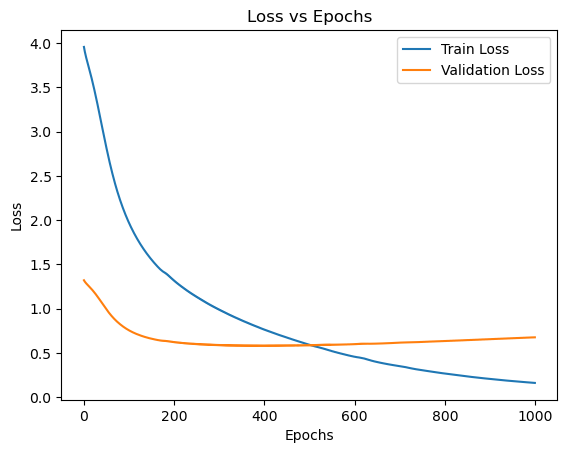

In [72]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5670
Cross Entropy: 2.0310


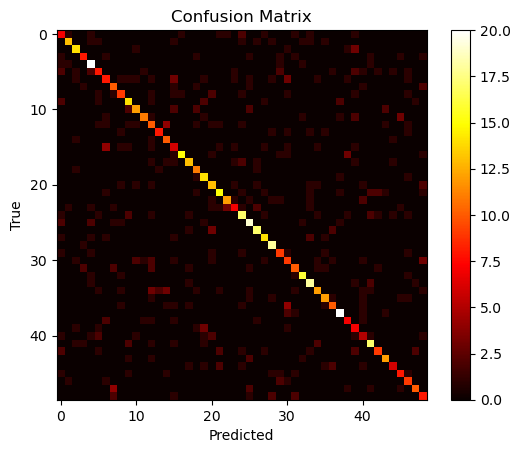

In [73]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [53]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9839544733431405
loss val: 1.3268360501094587
Epoch 10, Loss: 3.792780883566981
loss val: 1.2769738771465144
Epoch 20, Loss: 3.667718475012416
loss val: 1.2431997005130246
Epoch 30, Loss: 3.5267608108045376
loss val: 1.2047162087605516
Epoch 40, Loss: 3.3565732629921445
loss val: 1.1575379872841403
Epoch 50, Loss: 3.1586089173457257
loss val: 1.1014018593034611
Epoch 60, Loss: 2.9553821733146752
loss val: 1.0446042951782022
Epoch 70, Loss: 2.7601735430365006
loss val: 0.9898706341129107
Epoch 80, Loss: 2.5788457351696996
loss val: 0.9395210814525992
Epoch 90, Loss: 2.415657645776468
loss val: 0.8942331511598787
Epoch 100, Loss: 2.2713712087323397
loss val: 0.8554773150211776
Epoch 110, Loss: 2.1451718789443577
loss val: 0.8220320447530087
Epoch 120, Loss: 2.0347183377423512
loss val: 0.7934763655773557
Epoch 130, Loss: 1.9370397710093556
loss val: 0.768988272985567
Epoch 140, Loss: 1.8505929553008889
loss val: 0.7479395574206438
Epoch 150, Loss: 1.7733167837900656
loss

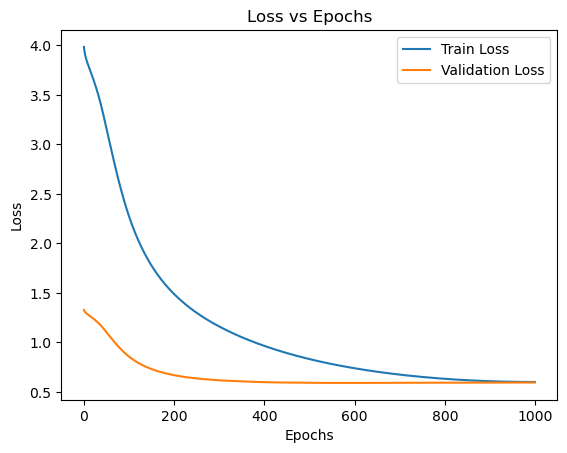

Accuracy: 0.5630
Cross Entropy: 1.7830


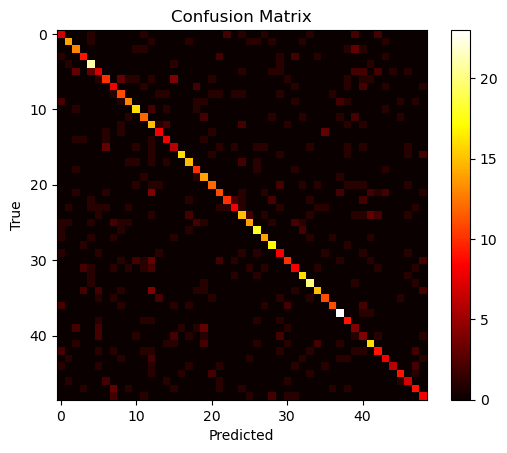

In [ ]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = True
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Accuracy: 0.5970
Cross Entropy: 3.5467


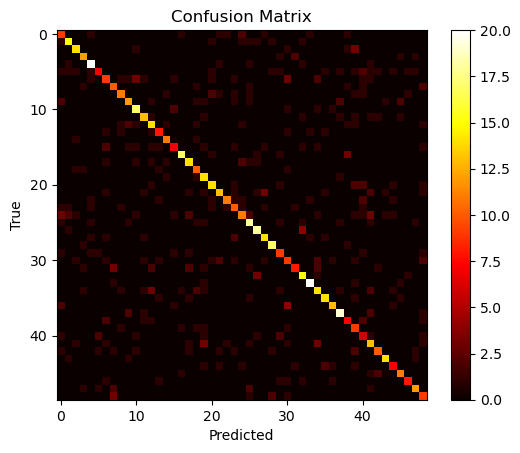

In [ ]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = True
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9116100264729496
loss val: 1.307670786023898
Epoch 10, Loss: 3.268098052843211
loss val: 1.1374204824624972
Epoch 20, Loss: 2.5636869458550553
loss val: 0.956103961928438
Epoch 30, Loss: 1.9814450881667196
loss val: 0.8042420124878482
Epoch 40, Loss: 1.5586709390567586
loss val: 0.7039498385017107
Epoch 50, Loss: 1.2424019496663665
loss val: 0.6453848803122043
Epoch 60, Loss: 0.9969158522777015
loss val: 0.6124614534814419
Epoch 70, Loss: 0.8033378830682264
loss val: 0.5954193175875337
Epoch 80, Loss: 0.6469095363968341
loss val: 0.5898726077394287
Epoch 90, Loss: 0.5180553972928851
loss val: 0.5928129247204983
Epoch 100, Loss: 0.41202662206836604
loss val: 0.6015352587078886
Epoch 110, Loss: 0.3250565034776638
loss val: 0.6139664403927145
Epoch 120, Loss: 0.25475875242045704
loss val: 0.6286911721874039
Epoch 130, Loss: 0.19929955780575795
loss val: 0.6441727459756421
Epoch 140, Loss: 0.15614922598943926
loss val: 0.6609343242637665
Epoch 150, Loss: 0.1229678092080995

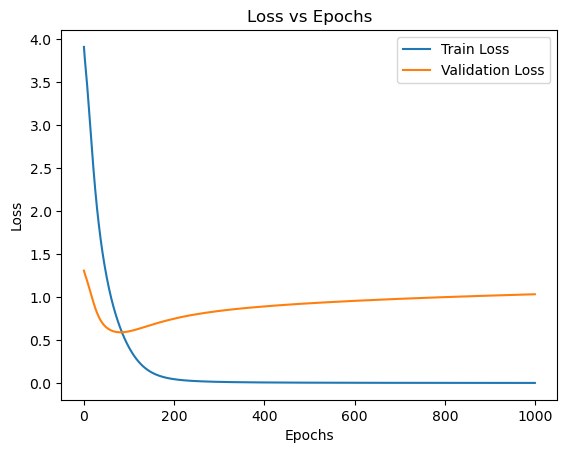

Accuracy: 0.5800
Cross Entropy: 3.2837


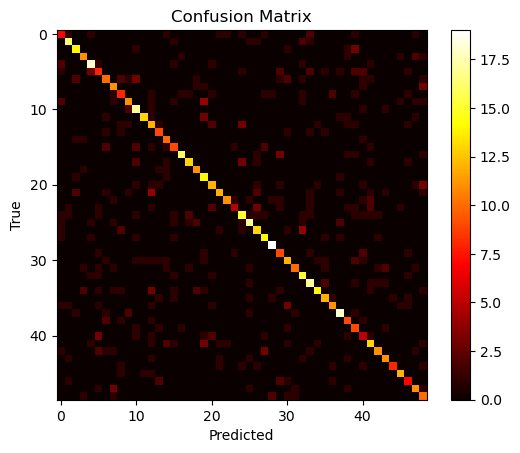

In [ ]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = True
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9906188111114855
loss val: 1.3327002890378612
Epoch 10, Loss: 3.773320264736053
loss val: 1.275197669826059
Epoch 20, Loss: 3.6187625319707193
loss val: 1.2337287949636777
Epoch 30, Loss: 3.4468349218770773
loss val: 1.1866323357729274
Epoch 40, Loss: 3.2519132465709175
loss val: 1.1330743603271596
Epoch 50, Loss: 3.037970602164368
loss val: 1.0741989559560063
Epoch 60, Loss: 2.8151936148497656
loss val: 1.011885714564555
Epoch 70, Loss: 2.6016356828682756
loss val: 0.9506984213320323
Epoch 80, Loss: 2.411984263559534
loss val: 0.8959492572495951
Epoch 90, Loss: 2.2454476962873193
loss val: 0.8487124041907907
Epoch 100, Loss: 2.1013399851087553
loss val: 0.8086515303015609
Epoch 110, Loss: 1.9755442183888867
loss val: 0.7749079190195918
Epoch 120, Loss: 1.8655715553526
loss val: 0.7466931038297656
Epoch 130, Loss: 1.769298728279511
loss val: 0.7232773248960903
Epoch 140, Loss: 1.6846028450214718
loss val: 0.7038976392464998
Epoch 150, Loss: 1.6092291532119591
loss val:

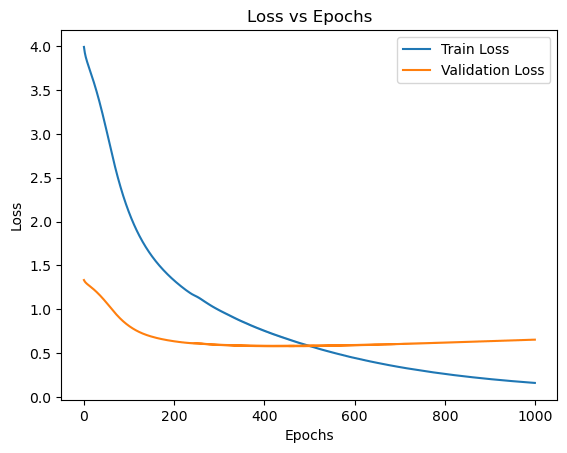

Accuracy: 0.6010
Cross Entropy: 1.9562


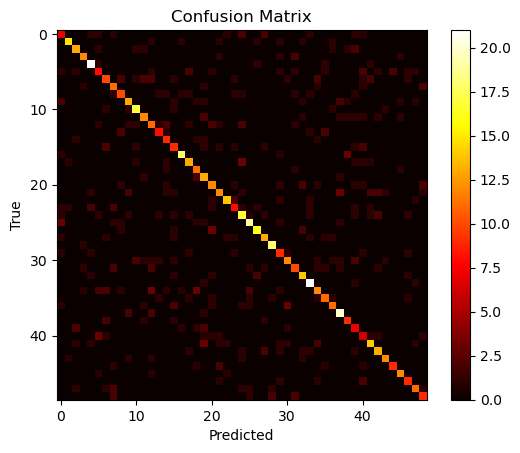

In [ ]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.981126091276247
loss val: 1.3266313318107825
Epoch 10, Loss: 3.7695392702085715
loss val: 1.2692970549752955
Epoch 20, Loss: 3.6311303165035604
loss val: 1.232637489621676
Epoch 30, Loss: 3.4737168569977195
loss val: 1.1894348992128734
Epoch 40, Loss: 3.285528206709306
loss val: 1.1363768411543858
Epoch 50, Loss: 3.065974467174766
loss val: 1.0738067671495954
Epoch 60, Loss: 2.8300233908616446
loss val: 1.005873207136019
Epoch 70, Loss: 2.60111694526762
loss val: 0.9406024827846359
Epoch 80, Loss: 2.398980058323862
loss val: 0.8830208418099723
Epoch 90, Loss: 2.226717355467847
loss val: 0.8348393035604136
Epoch 100, Loss: 2.0807332751576815
loss val: 0.7957034507117349
Epoch 110, Loss: 1.9565755324376124
loss val: 0.7641662661934133
Epoch 120, Loss: 1.8510674502623403
loss val: 0.7384818338260896
Epoch 130, Loss: 1.7596554687842836
loss val: 0.7167586047848507
Epoch 140, Loss: 1.679332736550591
loss val: 0.6985326341466607
Epoch 150, Loss: 1.6079469843629768
loss val: 

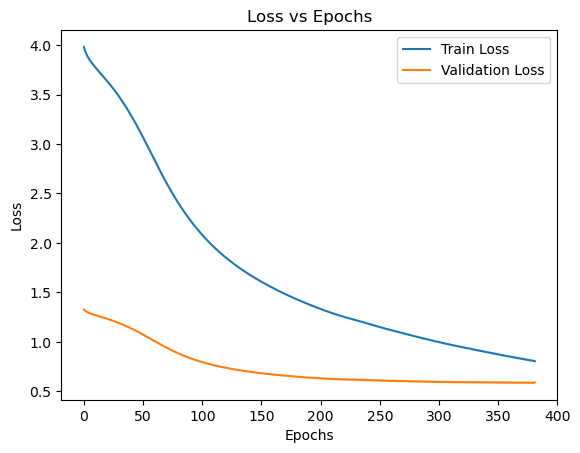

Accuracy: 0.5510
Cross Entropy: 1.7727


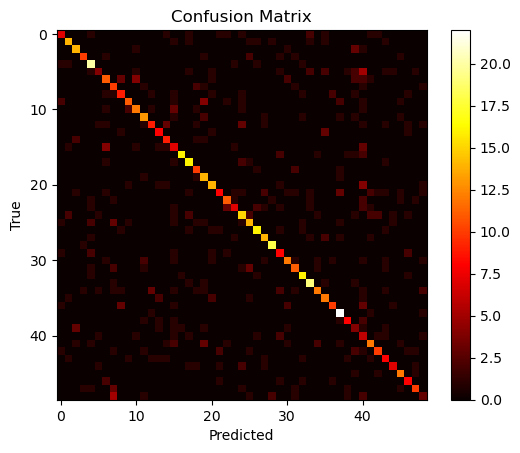

In [ ]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 4.201989648042915
loss val: 1.4043581626361423
Epoch 10, Loss: 3.9087320770036906
loss val: 1.3132693162006217
Epoch 20, Loss: 3.871185962439128
loss val: 1.2962855783700484
Epoch 30, Loss: 3.837035041253753
loss val: 1.288776371838838
Epoch 40, Loss: 3.800771018017381
loss val: 1.2817999704783314
Epoch 50, Loss: 3.78602999974912
loss val: 1.2693054641039565
Epoch 60, Loss: 3.754407223784946
loss val: 1.275649778259708
Epoch 70, Loss: 3.717444586253628
loss val: 1.258285499722589
Epoch 80, Loss: 3.707020151601022
loss val: 1.2619489721798225
Epoch 90, Loss: 3.657168832250089
loss val: 1.2441949404134112
Epoch 100, Loss: 3.6297190929064844
loss val: 1.2434120939395545
Epoch 110, Loss: 3.585871806563496
loss val: 1.2291425323087015
Epoch 120, Loss: 3.571459625173641
loss val: 1.2108954107971228
Epoch 130, Loss: 3.4920861701079655
loss val: 1.2148335020226535
Epoch 140, Loss: 3.4973626453615454
loss val: 1.1919424578079951
Epoch 150, Loss: 3.4554388807277725
loss val: 1.187

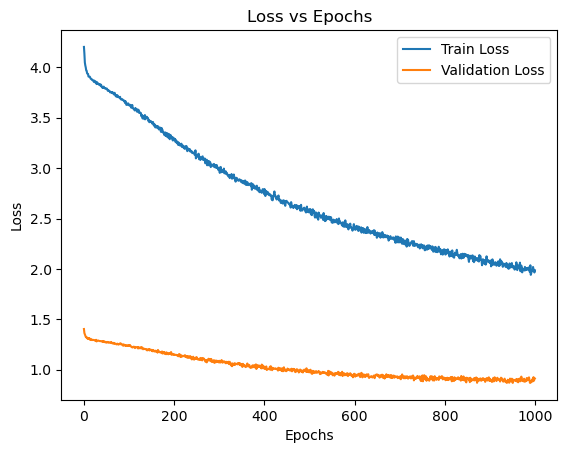

Accuracy: 0.5150
Cross Entropy: 1.9392


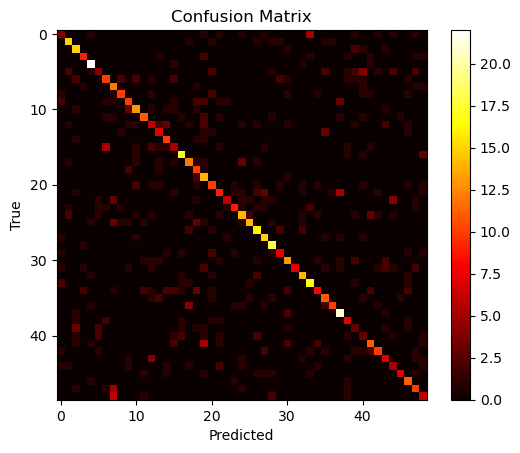

In [71]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

In [ ]:
# batch normalization
